In [24]:
import sys

sys.path.append("../")

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import data.drawings.make_tasks as drawing_tasks
from src.analysis_utilities import SynthesisExperimentAnalyzer
from src.config_builder import ExperimentType

In [27]:
sns.set_theme(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(12, 8)})

In [28]:
%config InlineBackend.figure_format = 'retina'

In [29]:
# EXPERIMENT_NAME = "runs_re2"
# DOMAIN = "re2"

EXPERIMENT_NAME = "runs_clevr"
DOMAIN = "clevr"

COMPUTE_LIKELIHOODS = True

FIGURES_DIR = os.path.join("figures", EXPERIMENT_NAME)
FIGURES_DOMAIN_DIR = os.path.join("figures", EXPERIMENT_NAME, DOMAIN)
os.makedirs(FIGURES_DOMAIN_DIR, exist_ok=True)

In [30]:
analyzer = SynthesisExperimentAnalyzer(
    experiment_name=EXPERIMENT_NAME,
    allow_incomplete_results=True,
    compute_likelihoods=COMPUTE_LIKELIHOODS,
    batch_size = 96,
    seeds = [111, 222, 333],
)

Experiment directory: ../experiments_iterative/outputs/runs_clevr
Available domains: ['clevr']


# Analysis 1: Tasks solved over time

### Tasks solved vs. LAPS iteration

In [31]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df

,request,task,programs,best_search_time,split,seed,iteration,experiment_type
0,"{'constructor': '->', 'arguments': [{'construc...",0-1_compare_integer-Is the number of large rub...,[],NaN,train,111,0,baseline_dreamcoder
1,"{'constructor': '->', 'arguments': [{'construc...",1-1_compare_integer-Is the number of metal sph...,[{'program': '(lambda (clevr_gt? 1 (clevr_coun...,0.000127,train,111,0,baseline_dreamcoder
2,"{'constructor': '->', 'arguments': [{'construc...",2-1_compare_integer-Is the number of cyan rubb...,[{'program': '(lambda (clevr_eq_material (clev...,0.000136,train,111,0,baseline_dreamcoder
3,"{'constructor': '->', 'arguments': [{'construc...",3-1_compare_integer-Is the number of large cyl...,[],NaN,train,111,0,baseline_dreamcoder
4,"{'constructor': '->', 'arguments': [{'construc...",4-1_compare_integer-Is the number of small yel...,[],NaN,train,111,0,baseline_dreamcoder
...,...,...,...,...,...,...,...,...
13927,"{'constructor': '->', 'arguments': [{'construc...",5-2_transform-If all of the cyan cylinders bec...,[],NaN,test,333,9,gpt_generation
13928,"{'constructor': '->', 'arguments': [{'construc...",6-2_transform-If all of the gray cubes became ...,[{'program': '(lambda (clevr_count (#(lambda (...,83.460032,test,333,9,gpt_generation
13929,"{'constructor': '->', 'arguments': [{'construc...",7-2_transform-If all of the large purple thing...,[],NaN,test,333,9,gpt_generation
13930,"{'constructor': '->', 'arguments': [{'construc...",8-2_transform-If all of the small rubber spher...,[{'program': '(lambda (#(lambda (lambda (clevr...,660.466438,test,333,9,gpt_generation


In [32]:
df_results = (
    df.groupby(["experiment_type", "seed", "iteration", "split"])
    .best_search_time.count()
    .reset_index(name="n_solved")
)

# Duplicate "benchmark_enumeration" for n_iterations
df_list = [df_results[df_results.experiment_type != "enumeration"]]
for iteration in sorted(df_results.iteration.unique()):
    df_tmp = df_results[df_results.experiment_type == "enumeration"].copy()
    df_tmp["iteration"] = iteration
    df_list.append(df_tmp)
df_results = pd.concat(df_list, axis=0).reset_index(drop=True)

df_results

,experiment_type,seed,iteration,split,n_solved
0,baseline_dreamcoder,111,0,test,45
1,baseline_dreamcoder,111,0,train,45
2,baseline_dreamcoder,111,1,train,108
3,baseline_dreamcoder,111,2,train,146
4,baseline_dreamcoder,111,3,test,97
...,...,...,...,...,...
79,gpt_generation,333,6,train,169
80,gpt_generation,333,7,train,172
81,gpt_generation,333,8,train,176
82,gpt_generation,333,9,test,96


Text(0.5, 1.0, 'clevr')

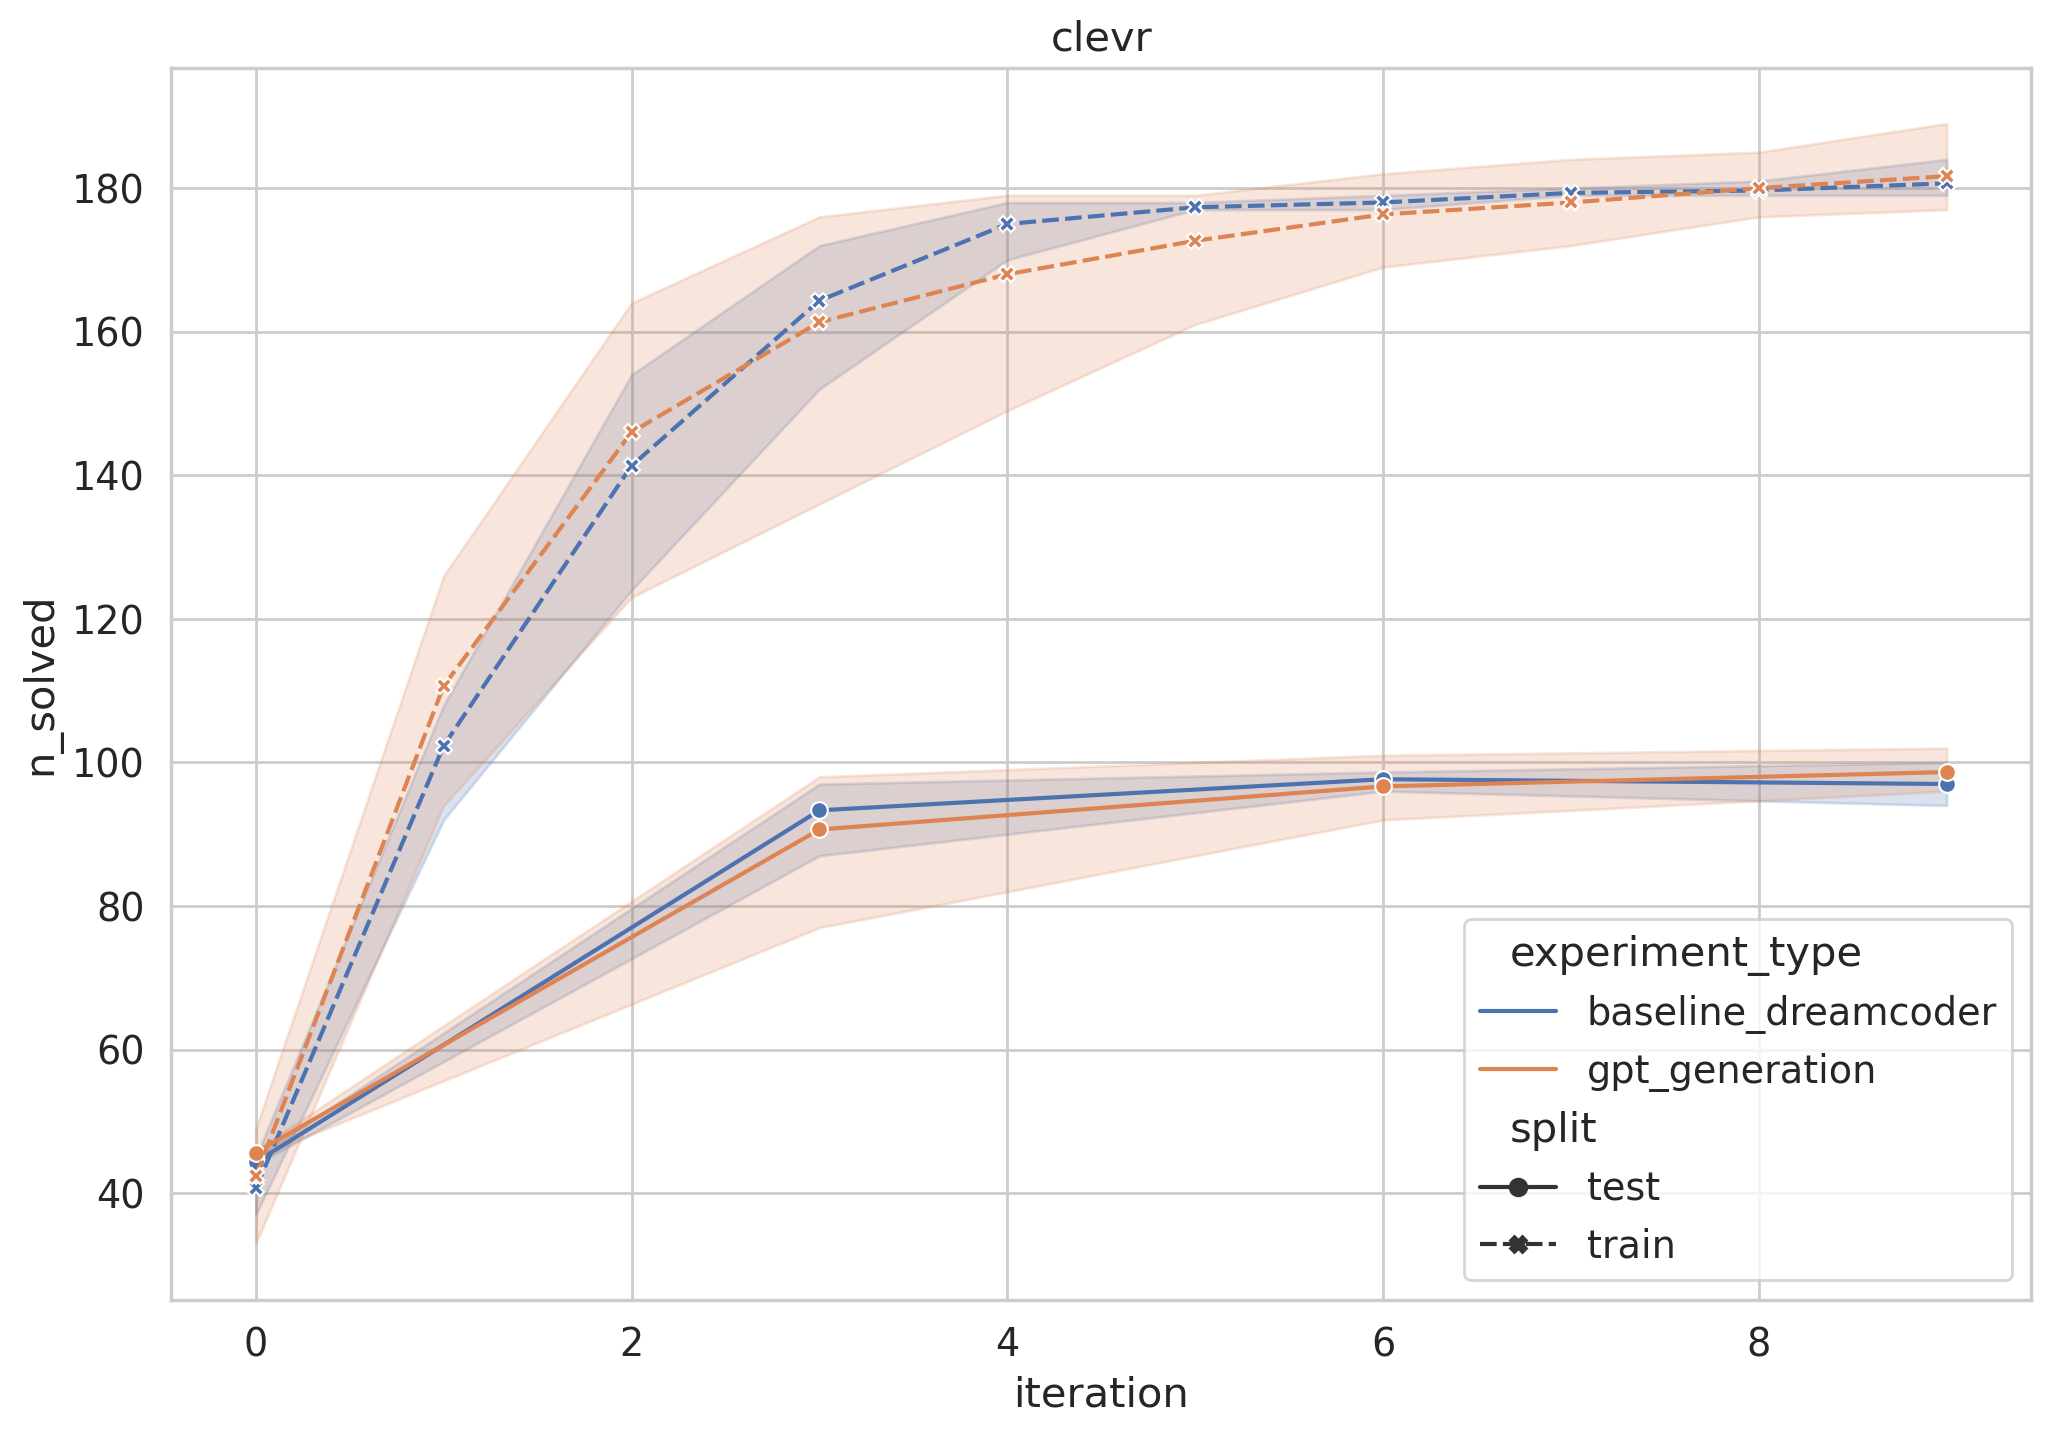

In [33]:
sns.lineplot(
    data=df_results, 
    x="iteration", 
    y="n_solved", 
    hue="experiment_type",
    style="split",
    markers=True,
)
plt.title(f"{DOMAIN}")

Text(0.5, 0.98, 'clevr')

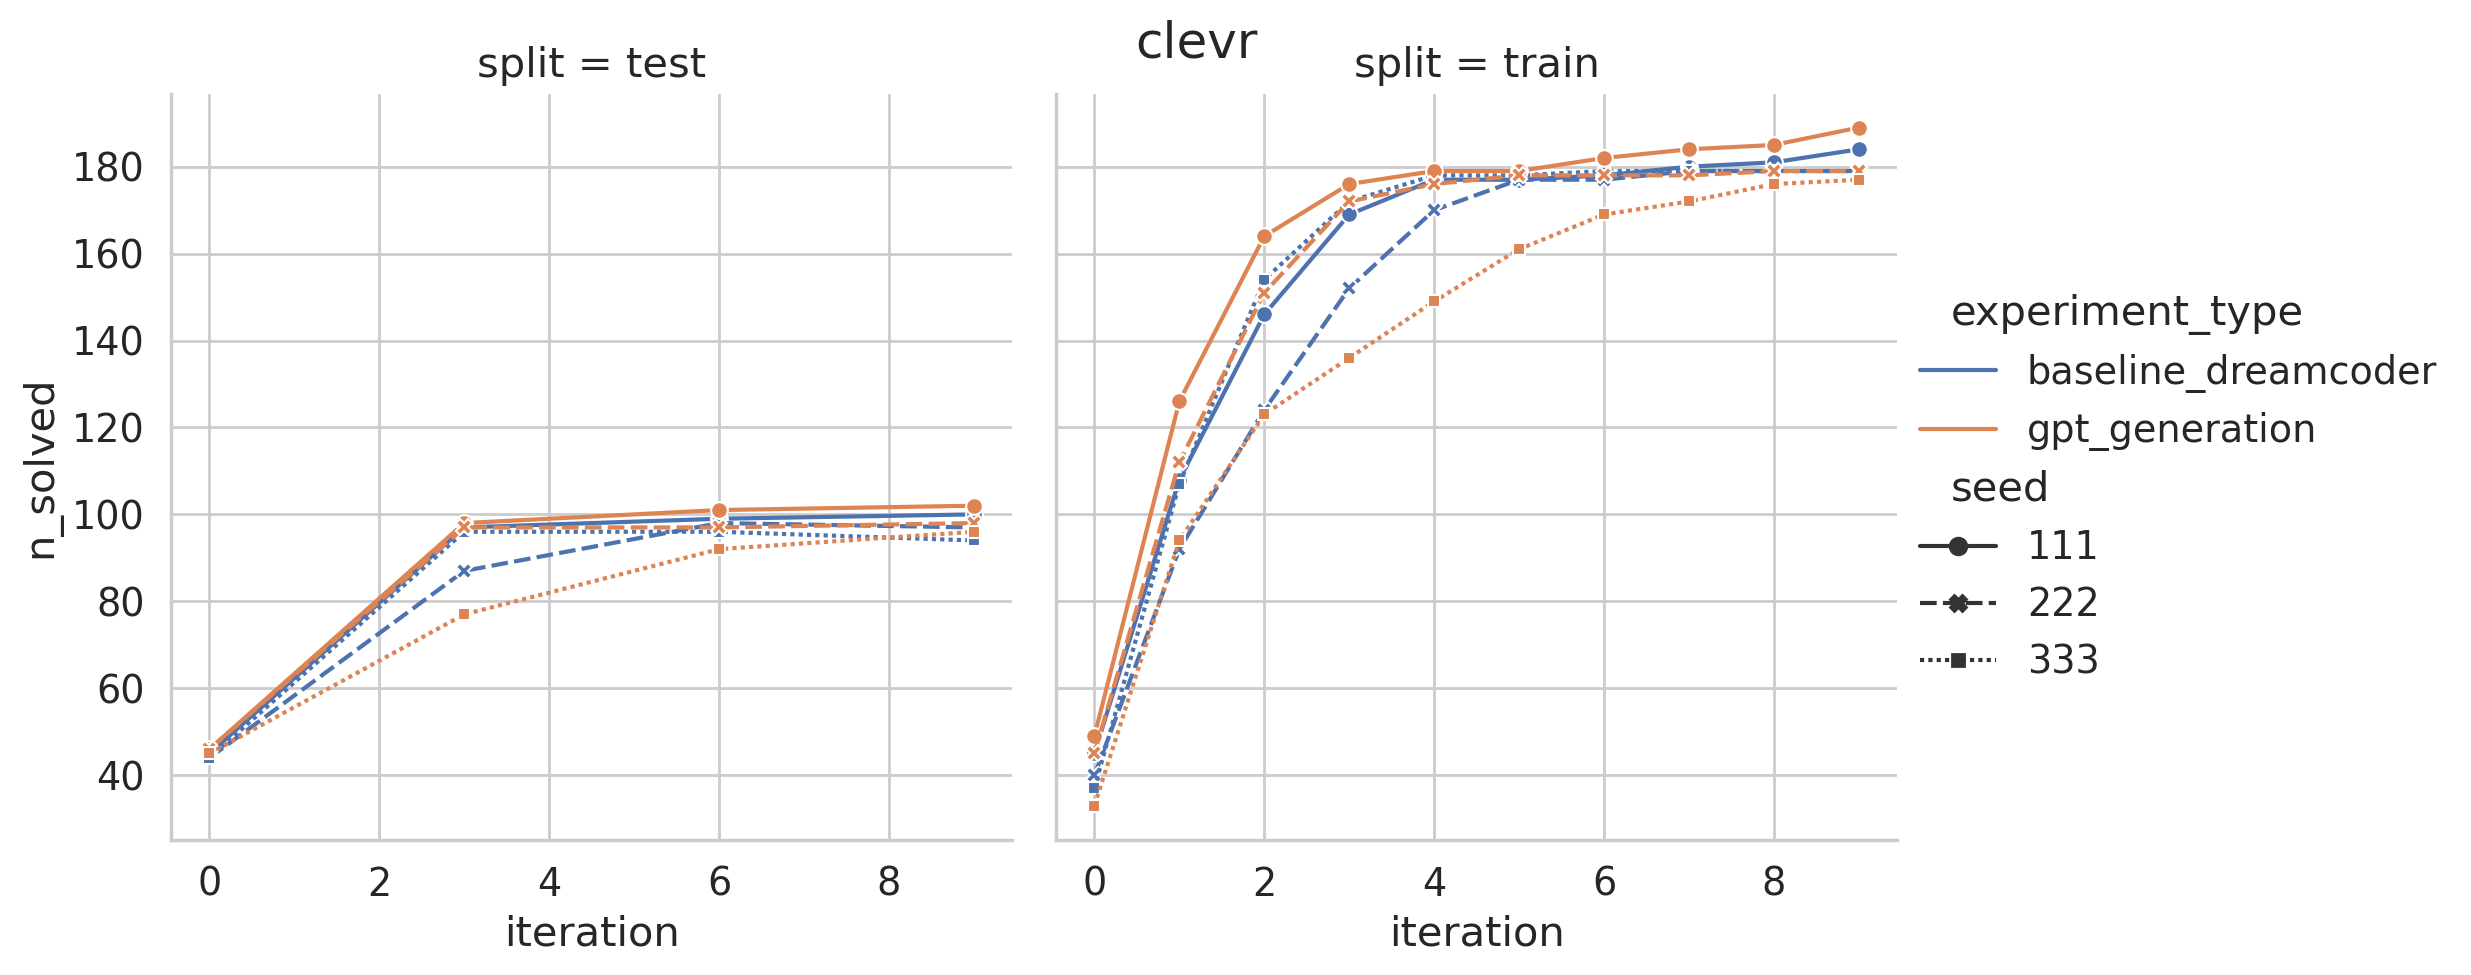

In [38]:
sns.relplot(
    data=df_results,
    kind="line",
    col="split",
    x="iteration", 
    y="n_solved", 
    hue="experiment_type",
    style="seed",
    markers=True,
)
plt.suptitle(f"{DOMAIN}")

### Tasks solved vs. search time

In [40]:
df_search_time = analyzer.get_search_time_results_for_domain(DOMAIN)
df_search_time

Using enumeration_timeout: 1000


,time,n_solved,experiment_type,seed,iteration,split
0,0,0,baseline_dreamcoder,111,0,test
1,1,1,baseline_dreamcoder,111,0,test
2,2,1,baseline_dreamcoder,111,0,test
3,3,2,baseline_dreamcoder,111,0,test
4,4,2,baseline_dreamcoder,111,0,test
...,...,...,...,...,...,...
84079,996,177,gpt_generation,333,9,train
84080,997,177,gpt_generation,333,9,train
84081,998,177,gpt_generation,333,9,train
84082,999,177,gpt_generation,333,9,train


In [ ]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "train"],
    x="time",
    y="n_solved",
    # hue="seed",
    hue="iteration",
    size="iteration",
    legend="full",
    errorbar="se",
)
g.set(xscale='symlog')
plt.title(f"{DOMAIN} (train)")

Text(0.5, 0.98, 'clevr (train)')

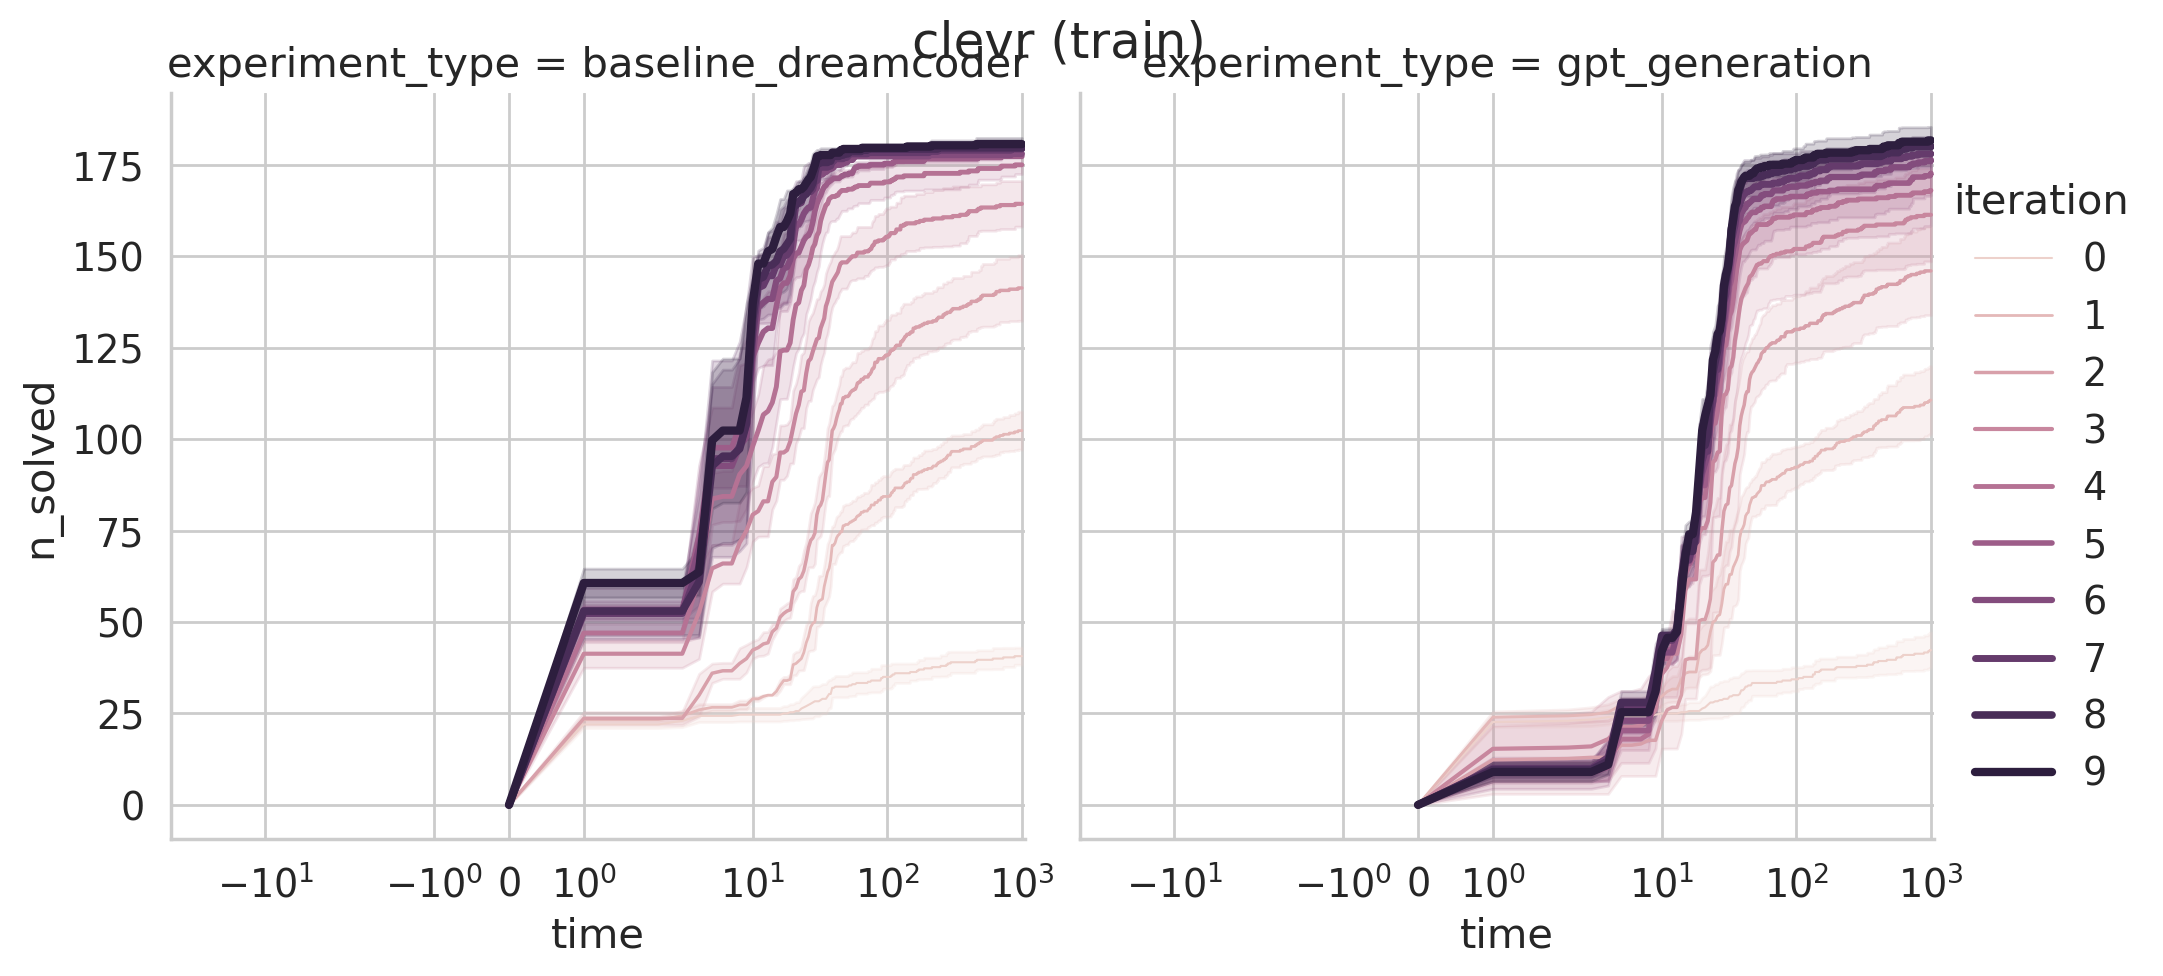

In [41]:
g = sns.relplot(
    data=df_search_time[df_search_time.split == "train"],
    col="experiment_type",
    x="time",
    y="n_solved",
    hue="iteration",
    size="iteration",
    legend="full",
    kind="line",
    errorbar="se",
)
g.set(xscale='symlog')
plt.suptitle(f"{DOMAIN} (train)")

Text(0.5, 1.0, 'clevr (test)')

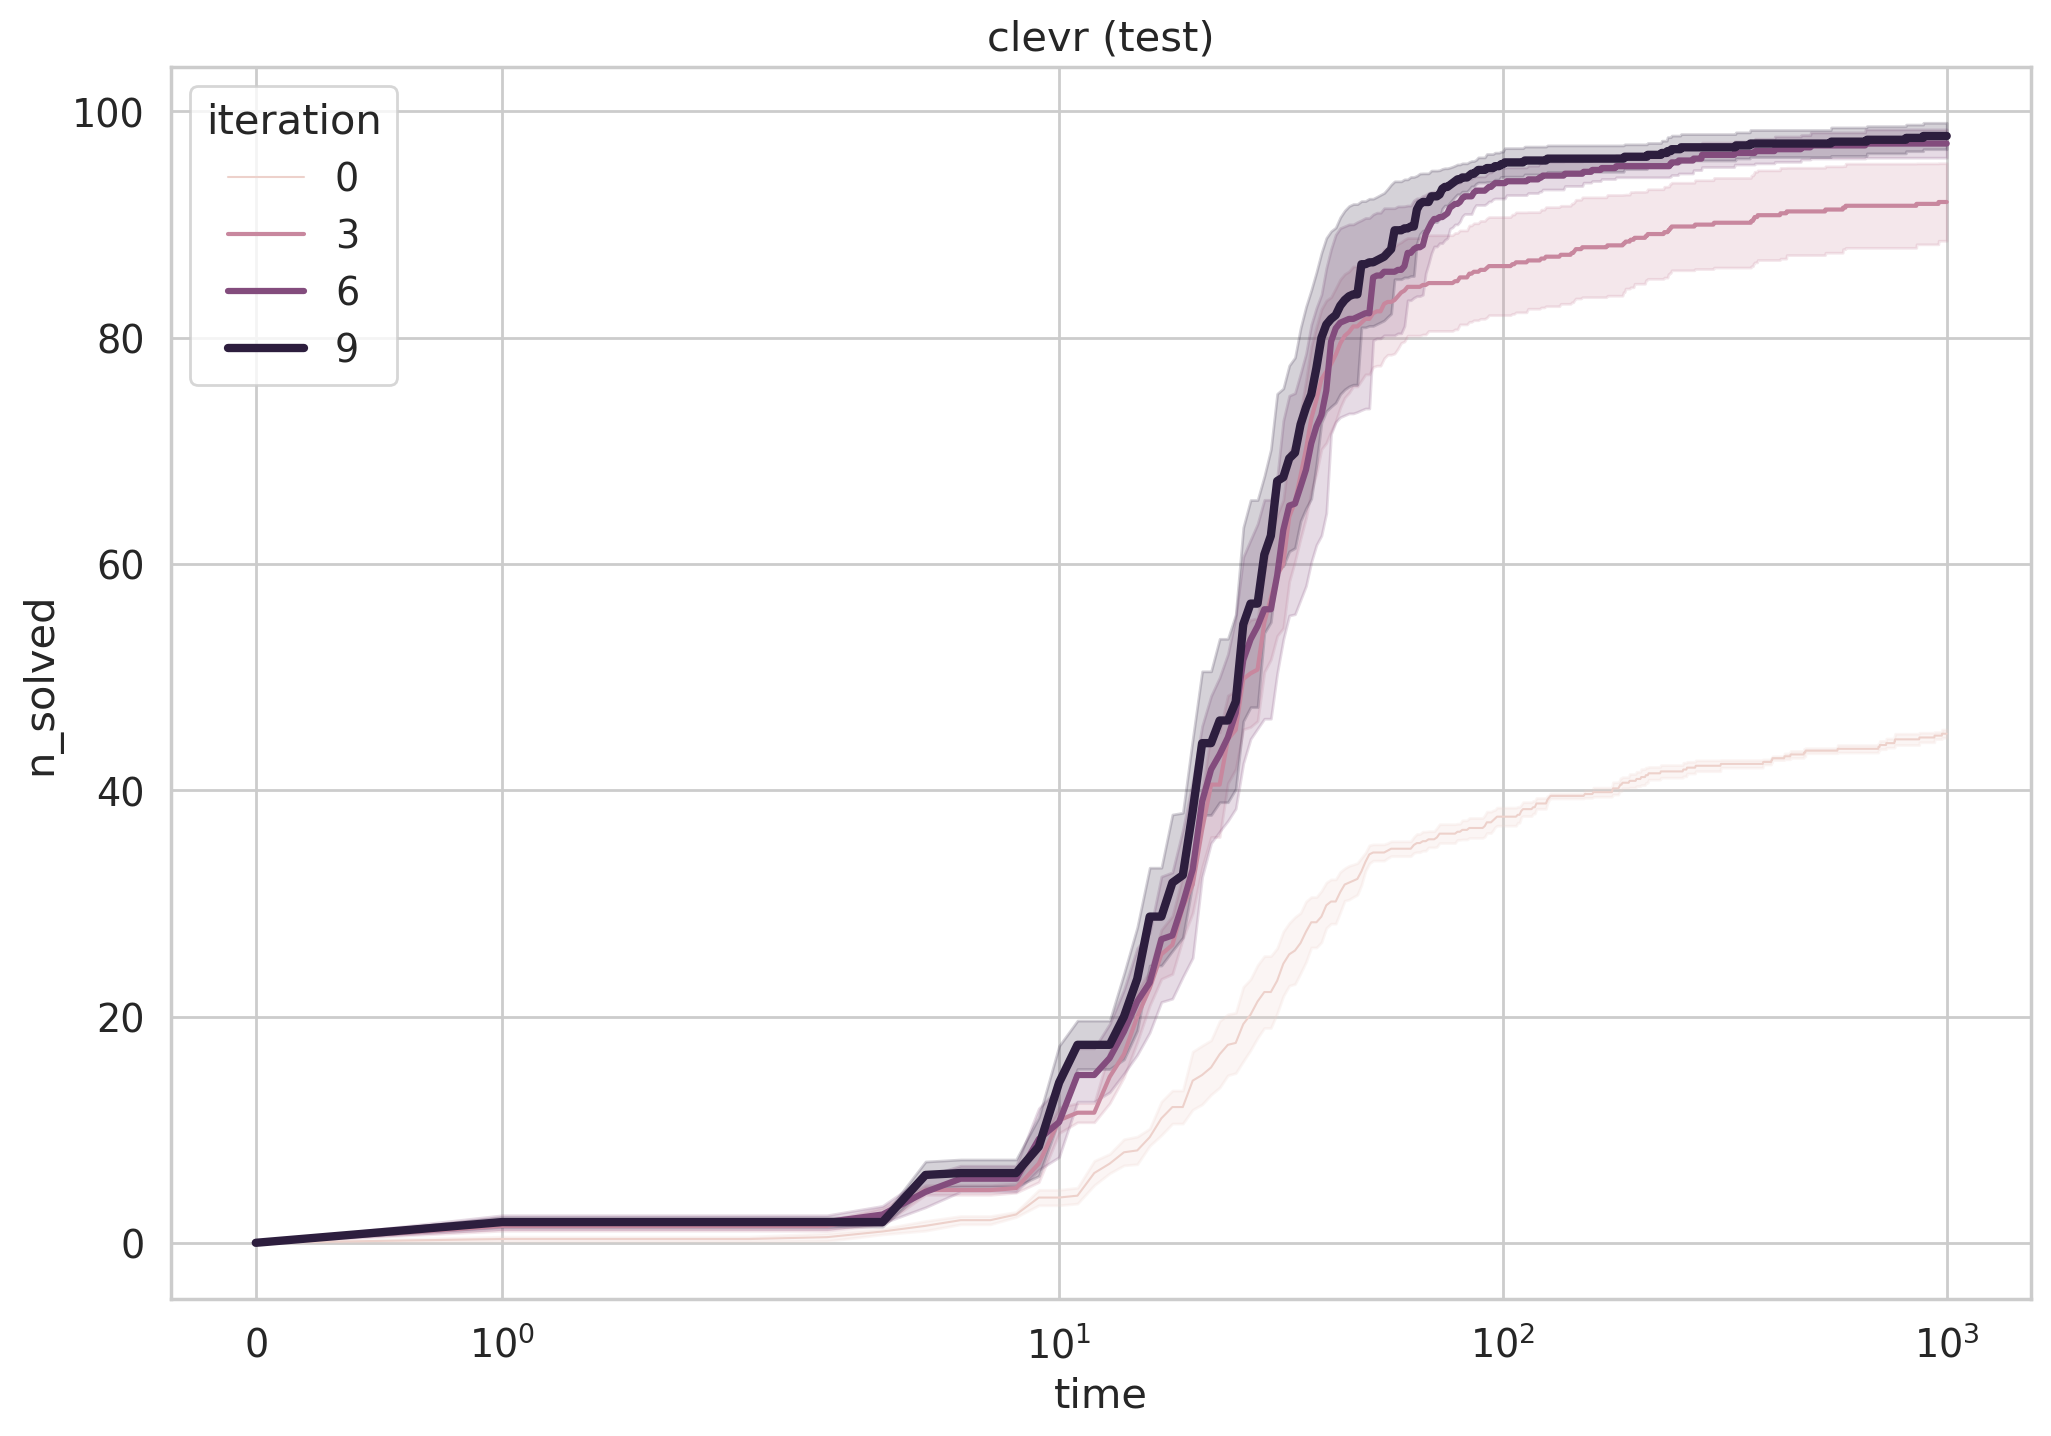

In [42]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "test"],
    x="time",
    y="n_solved",
    # hue="seed",
    hue="iteration",
    size="iteration",
    legend="full",
    errorbar="se",
)
g.set(xscale='symlog')
plt.title(f"{DOMAIN} (test)")

Text(0.5, 0.98, 'clevr (test)')

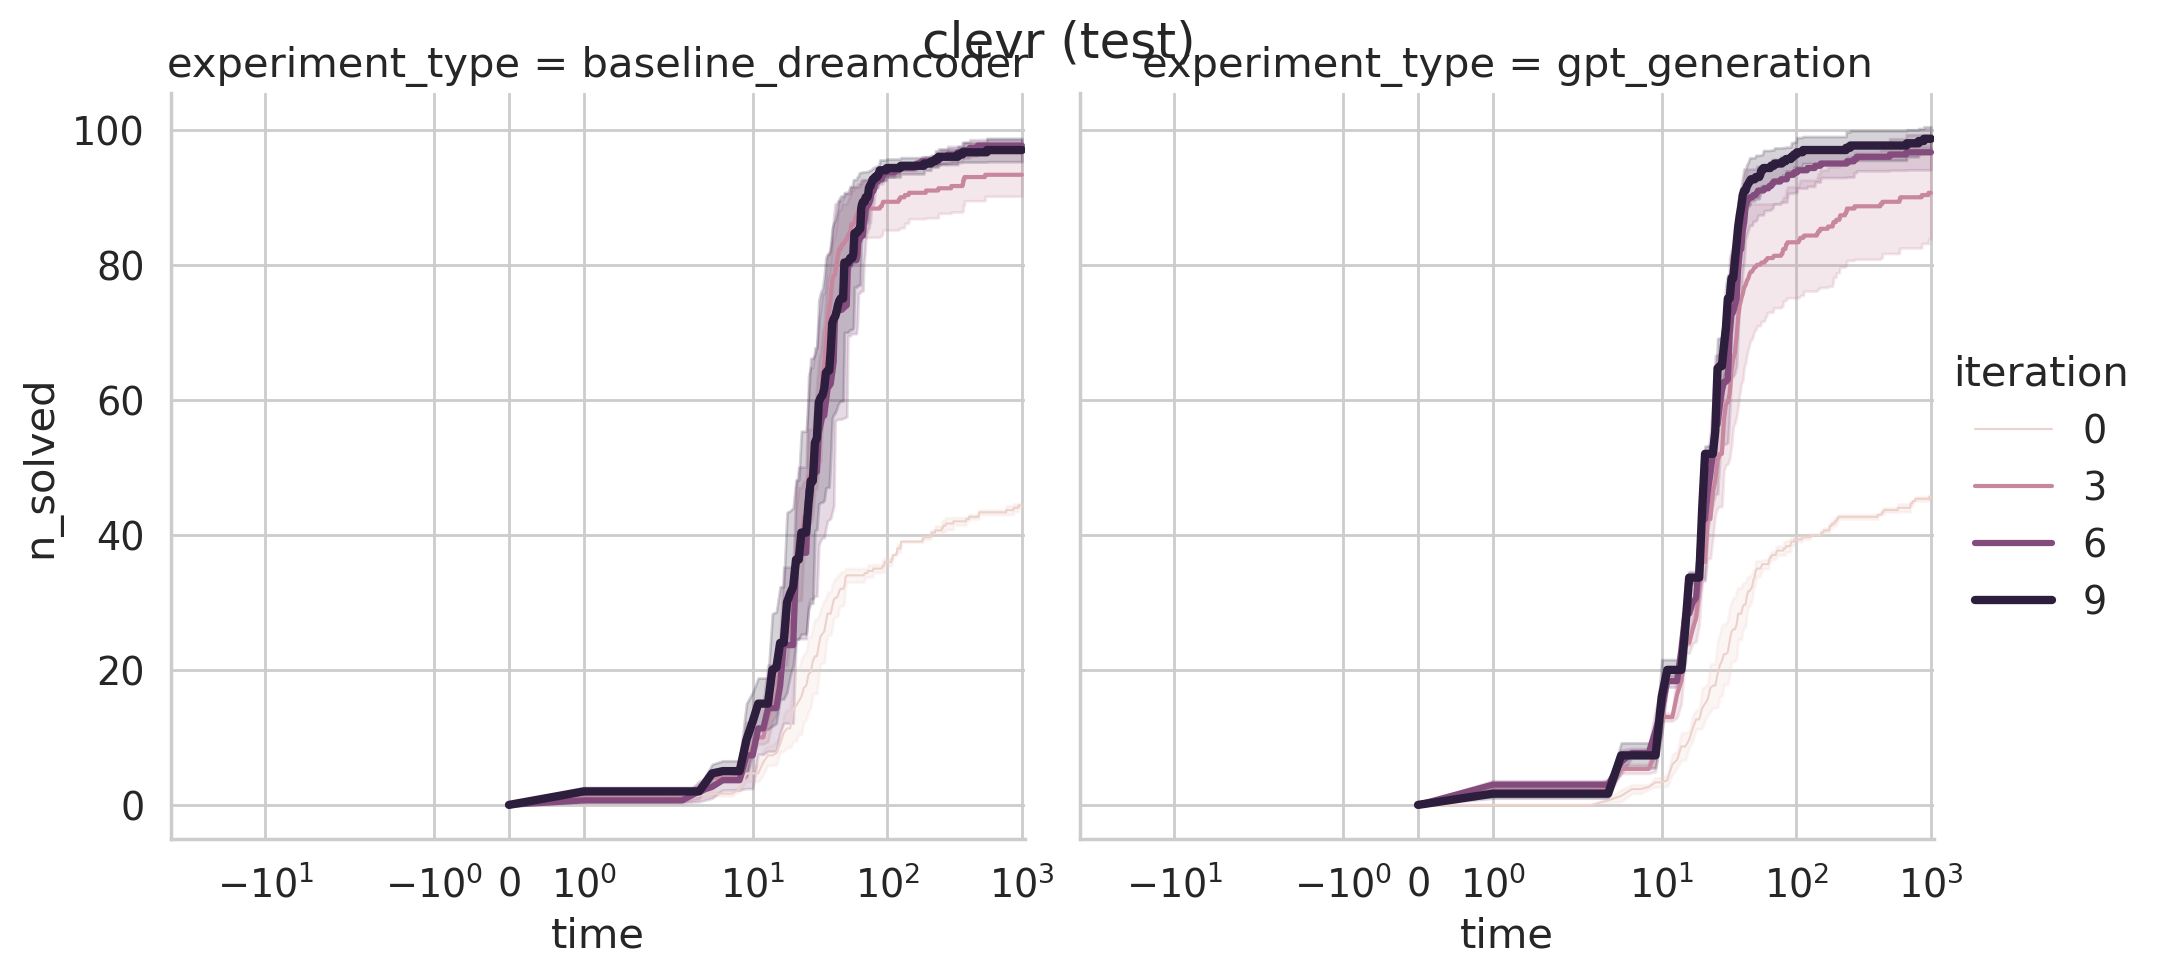

In [43]:
g = sns.relplot(
    data=df_search_time[df_search_time.split == "test"],
    col="experiment_type",
    x="time",
    y="n_solved",
    hue="iteration",
    size="iteration",
    legend="full",
    kind="line",
    errorbar="se",
)
g.set(xscale='symlog')
plt.suptitle(f"{DOMAIN} (test)")

# Analysis 2: Library abstractions

In [61]:
df_abstractions = analyzer.get_abstractions_for_domain(DOMAIN)
df_abstractions.to_csv(f"{DOMAIN}_abstractions.csv", index=False)
df_abstractions

,name,arity,utility,compression_ratio,cumulative_compression_ratio,body,dreamcoder,experiment_type,random_seed,iteration,batch_size
0,fn_0,3,3549,1.074101,1.074101,(clevr_car (clevr_fold #2 #1 (lam (lam (clevr_...,#(lambda (lambda (lambda (clevr_car (clevr_fol...,baseline_dreamcoder,111,0,96
1,fn_1,2,2726,1.060352,1.138926,(clevr_relate (clevr_car #0) #1 #0),#(lambda (lambda (clevr_relate (clevr_car $1) ...,baseline_dreamcoder,111,0,96
2,fn_2,3,2323,1.054219,1.200677,(clevr_if (clevr_eq_shape (clevr_query_shape (...,#(lambda (lambda (lambda (clevr_if (clevr_eq_s...,baseline_dreamcoder,111,0,96
3,fn_3,3,1616,1.039196,1.247738,(clevr_if (clevr_eq_shape clevr_sphere (clevr_...,#(lambda (lambda (lambda (clevr_if (clevr_eq_s...,baseline_dreamcoder,111,0,96
4,fn_4,3,1414,1.035514,1.292051,(clevr_if (clevr_lt? (clevr_count #1) 9) (clev...,#(lambda (lambda (lambda (clevr_if (clevr_lt? ...,baseline_dreamcoder,111,0,96
...,...,...,...,...,...,...,...,...,...,...,...
595,fn_5,2,19740,1.181562,3.883429,(clevr_car (clevr_fold #1 #1 (lam (lam (clevr_...,#(lambda (lambda (clevr_car (clevr_fold $0 $0 ...,gpt_generation,333,9,96
596,fn_6,3,4249,1.040670,4.041369,(clevr_map (lam (clevr_if (clevr_eq_size #2 (c...,#(lambda (lambda (lambda (clevr_map (lambda (c...,gpt_generation,333,9,96
597,fn_7,3,2733,1.026862,4.149930,(clevr_count (clevr_fold #1 #1 (lam (lam (clev...,#(lambda (lambda (lambda (clevr_count (clevr_f...,gpt_generation,333,9,96
598,fn_8,2,2730,1.027573,4.264354,(clevr_count (clevr_fold (fn_6 #0 #1 clevr_sma...,#(lambda (lambda (clevr_count (clevr_fold (#(l...,gpt_generation,333,9,96


/opt/conda/envs/laps/lib/python3.7/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


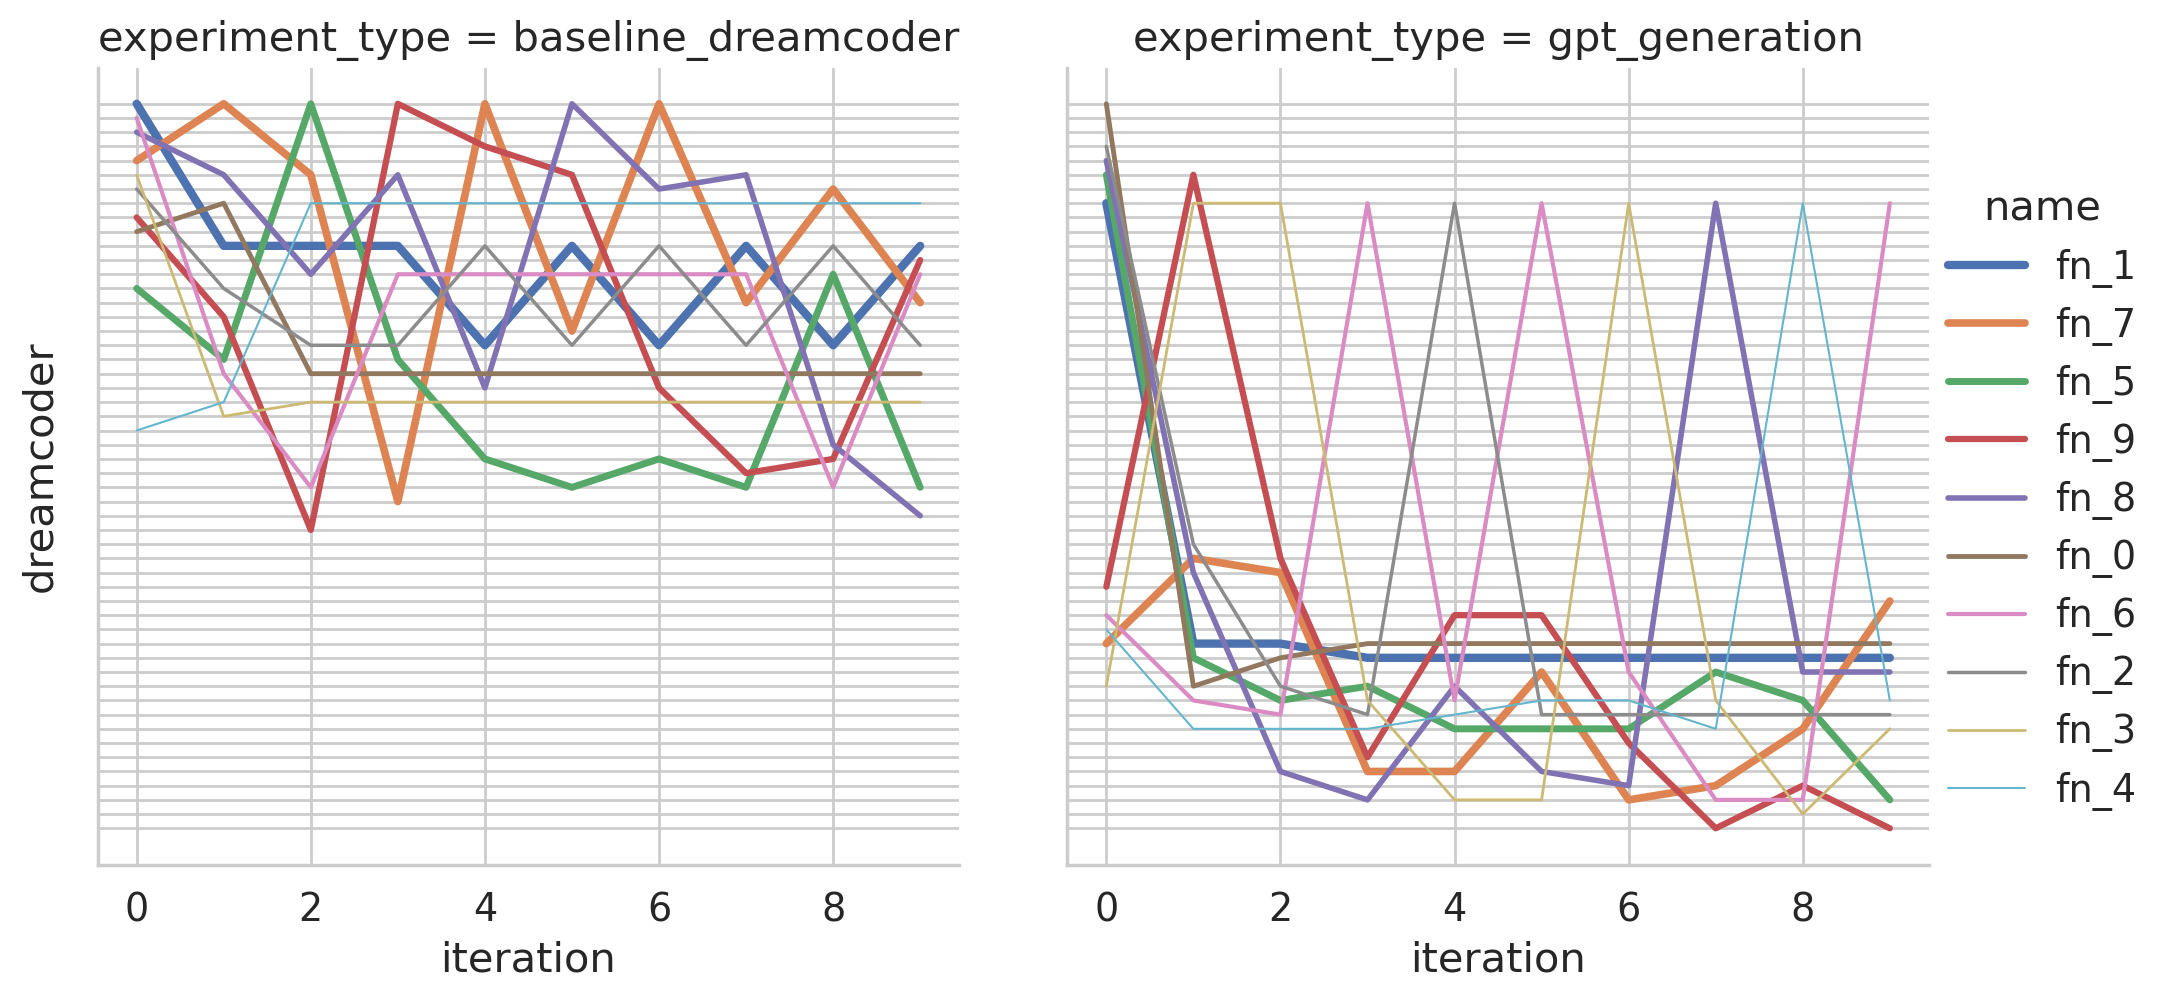

In [99]:
ax = sns.relplot(data=df_abstractions.query("random_seed == 111").sort_values(by=["dreamcoder"], key=lambda x: x.str.len() if not x.startswith("fn_") else x, kind="line", col="experiment_type", y="dreamcoder", x="iteration", hue="name", size="name")
ax.set(yticklabels=[])
plt.show()

In [ ]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    display(df_abstractions.sort_values(["experiment_type", "random_seed", "name", "iteration"])[["experiment_type", "random_seed", "name", "iteration", "arity", "compression_ratio", "dreamcoder"]])

<AxesSubplot:xlabel='name', ylabel='compression_ratio'>

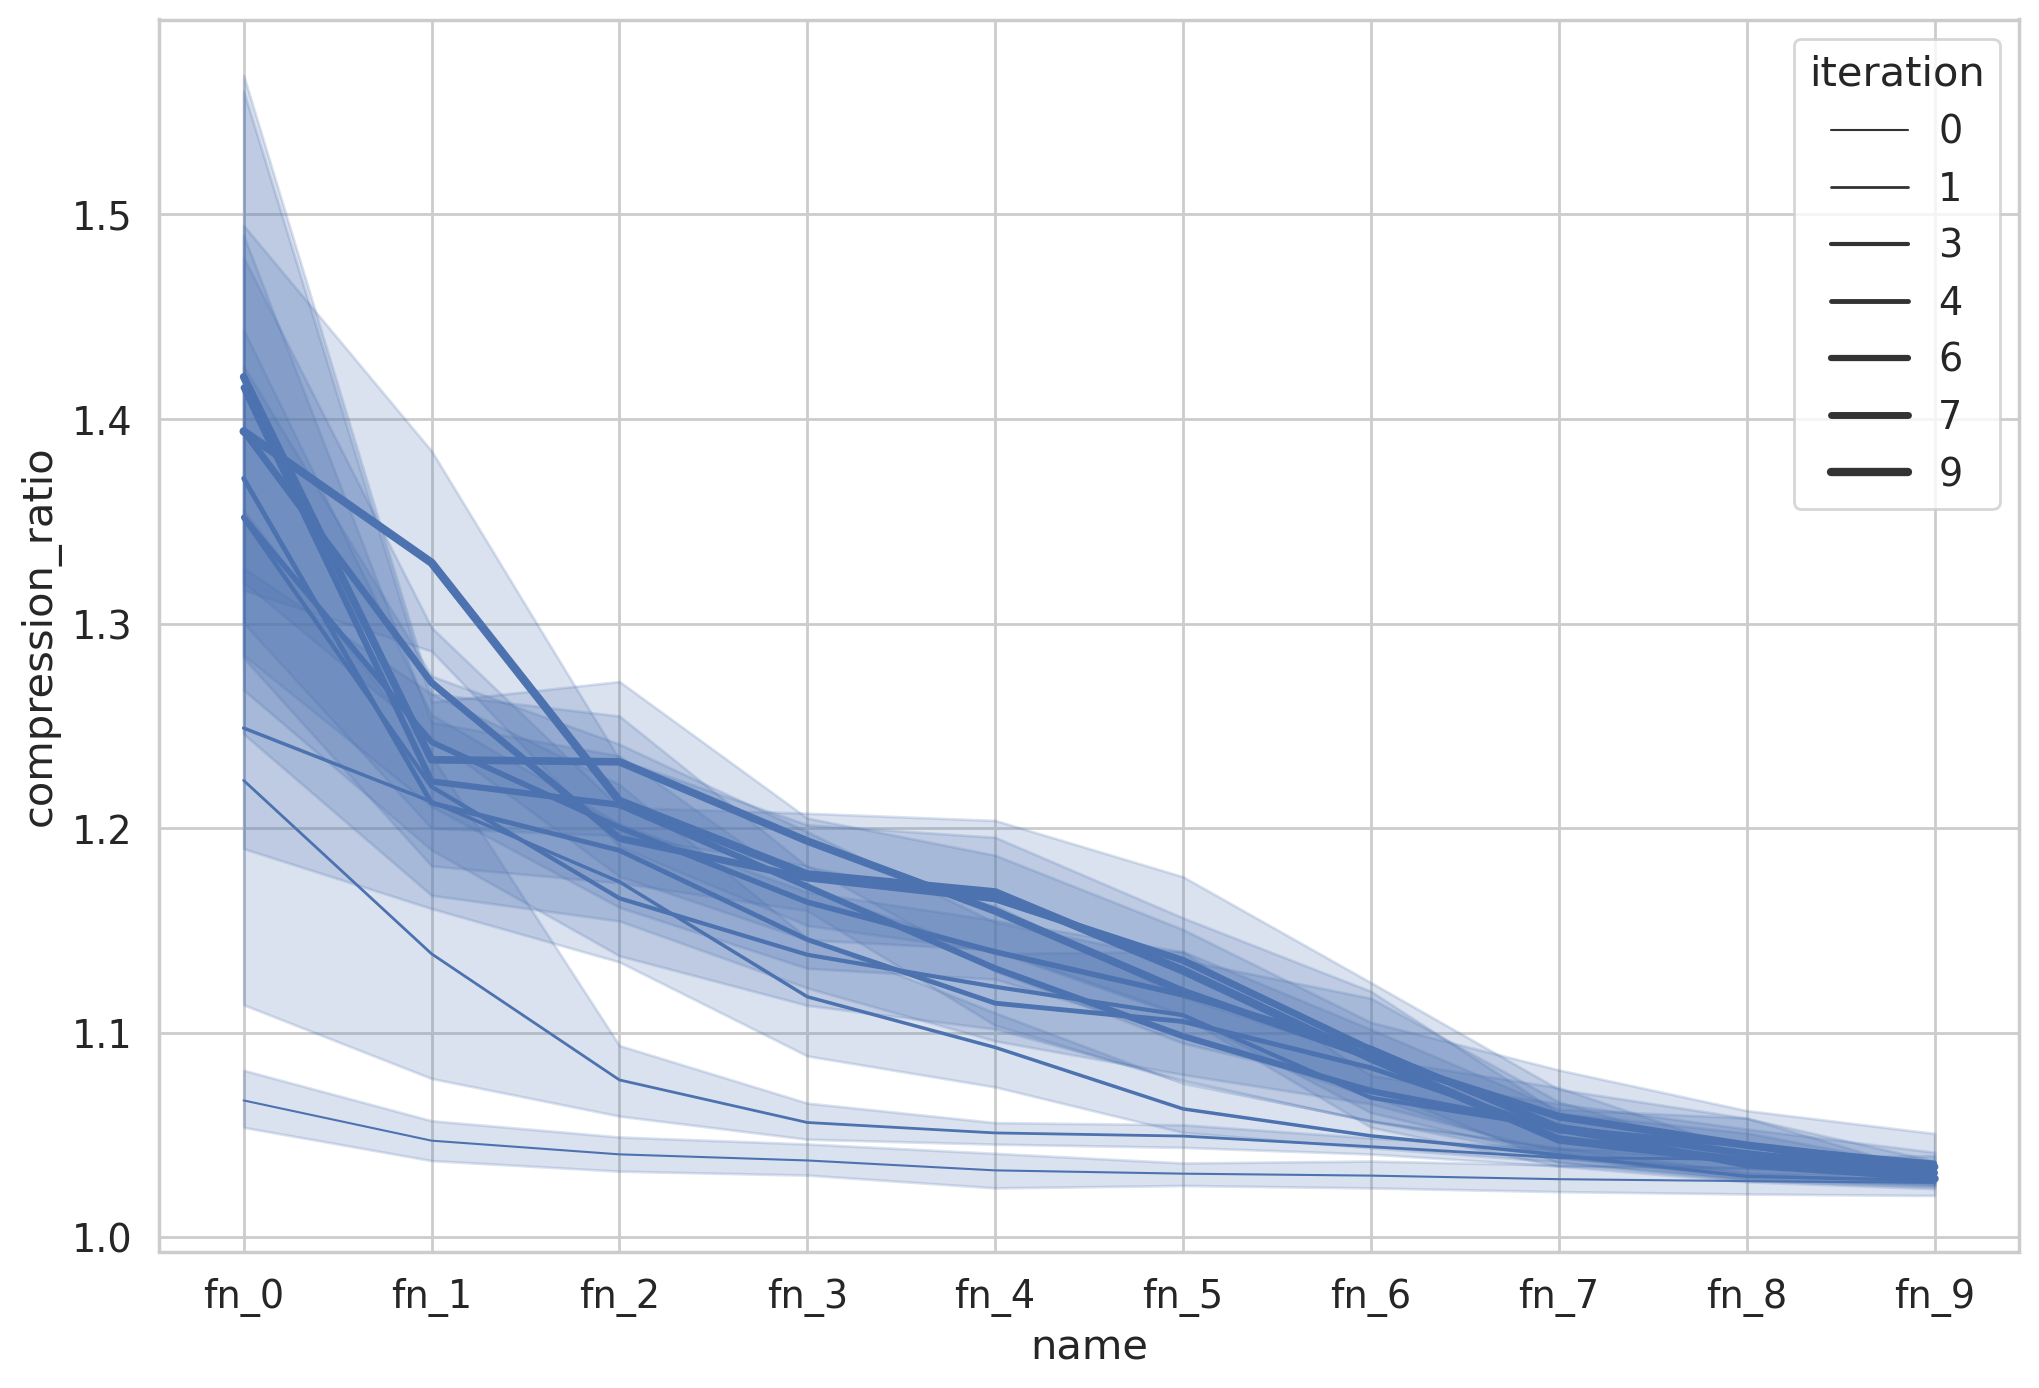

In [53]:
sns.lineplot(data=df_abstractions, x="name", y="compression_ratio", size="iteration")

Text(0.5, 1.0, 'clevr compressivity of library')

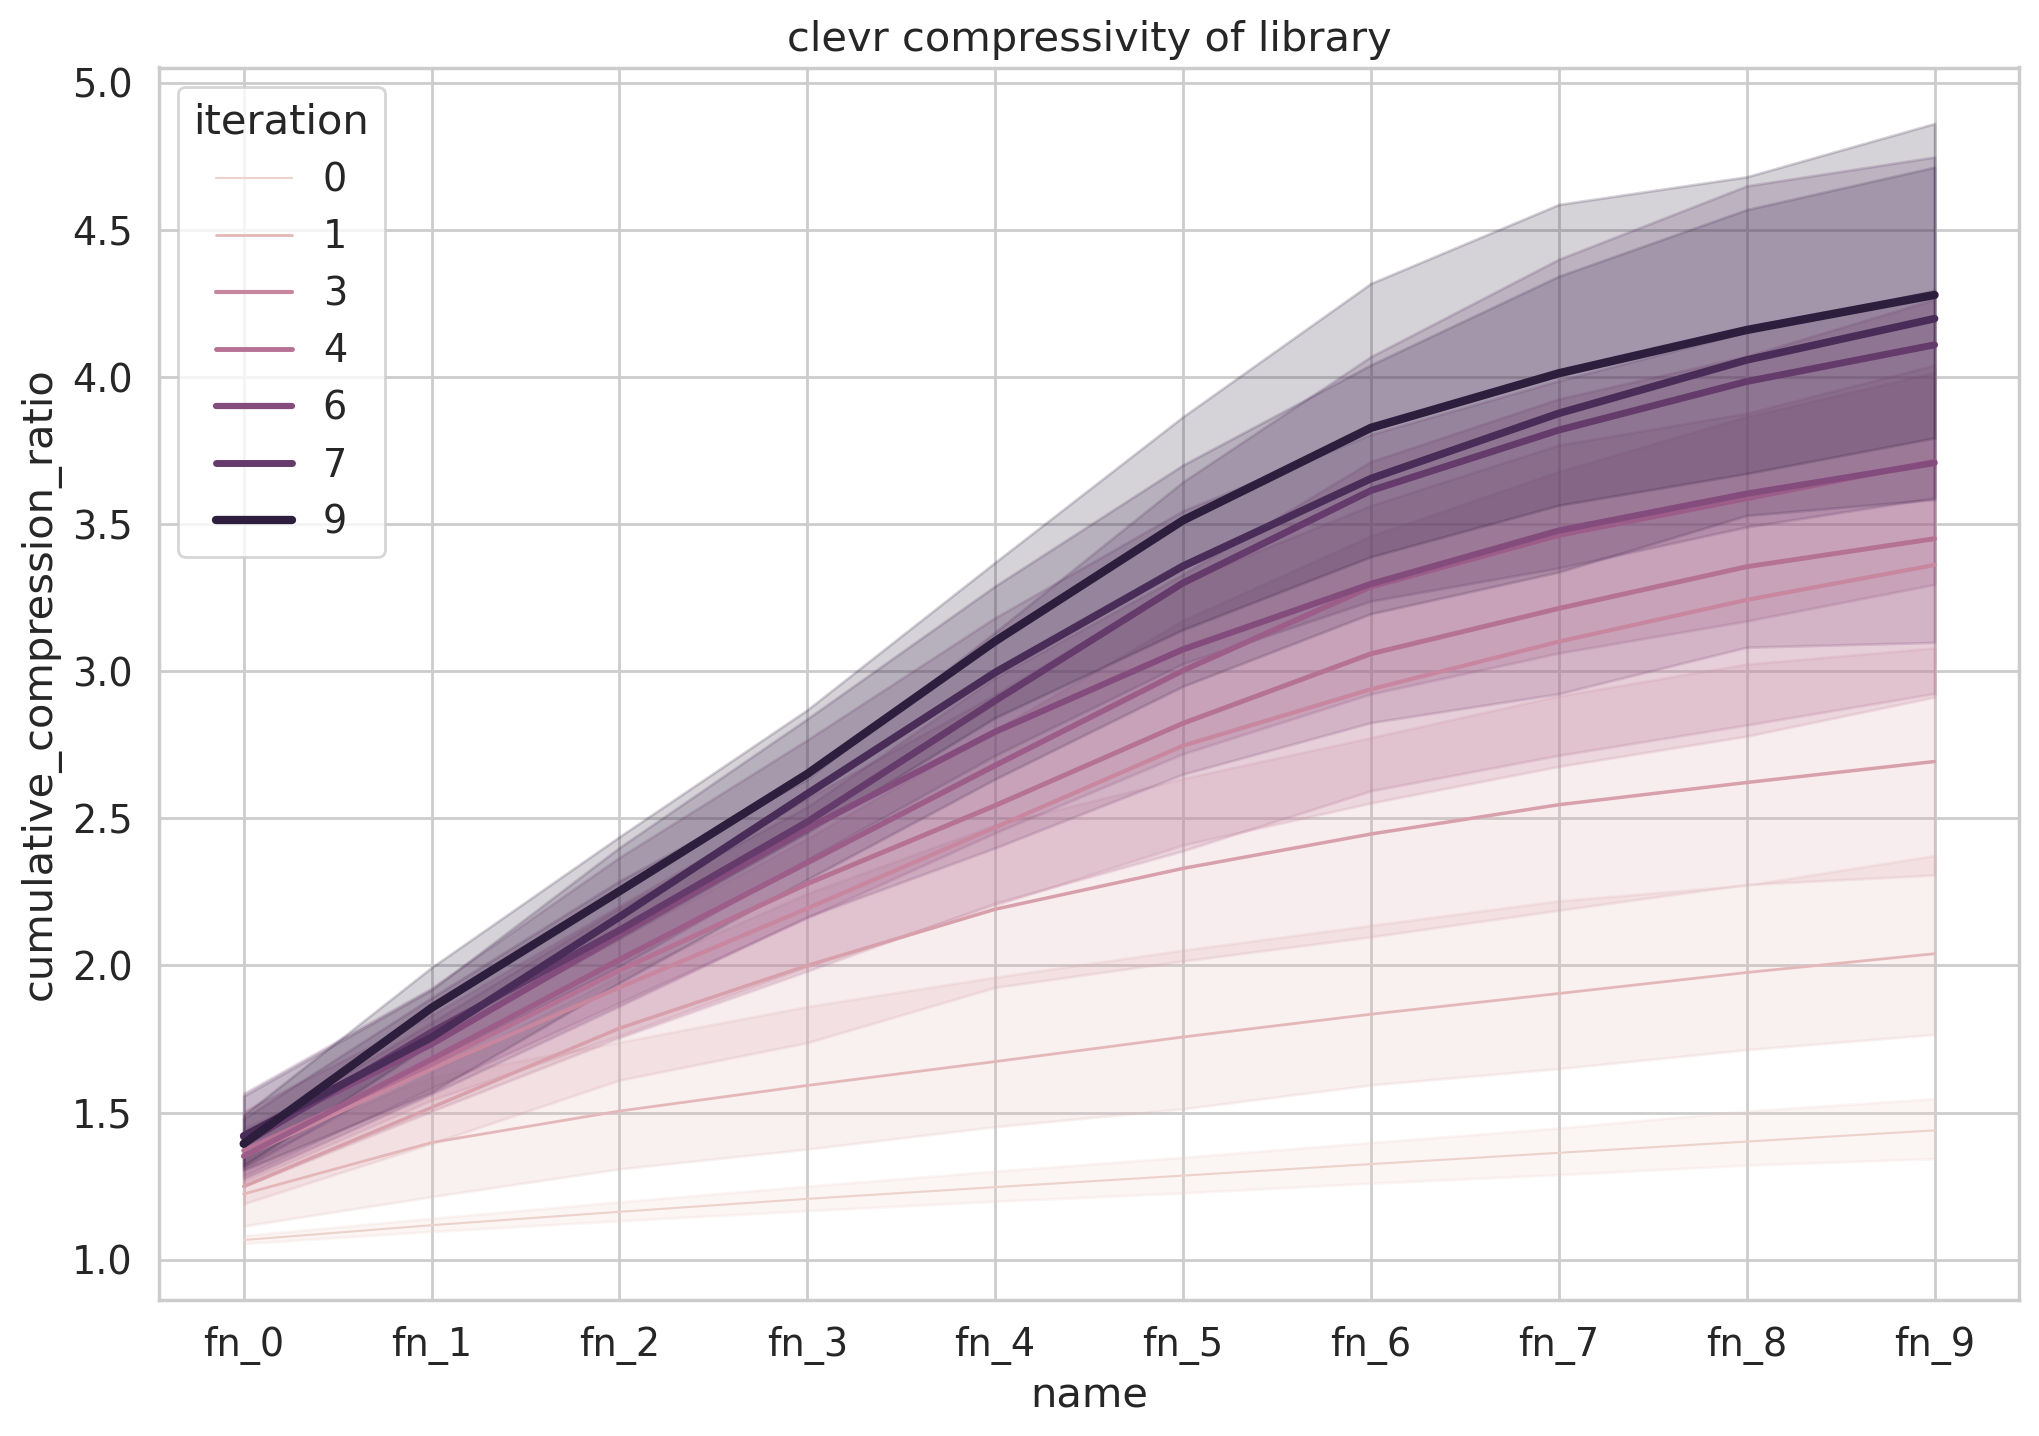

In [54]:
sns.lineplot(data=df_abstractions, x="name", y="cumulative_compression_ratio", size="iteration", hue="iteration")
plt.title(f"{DOMAIN} compressivity of library")

Text(0.5, 0.98, 'clevr compressivity of library')

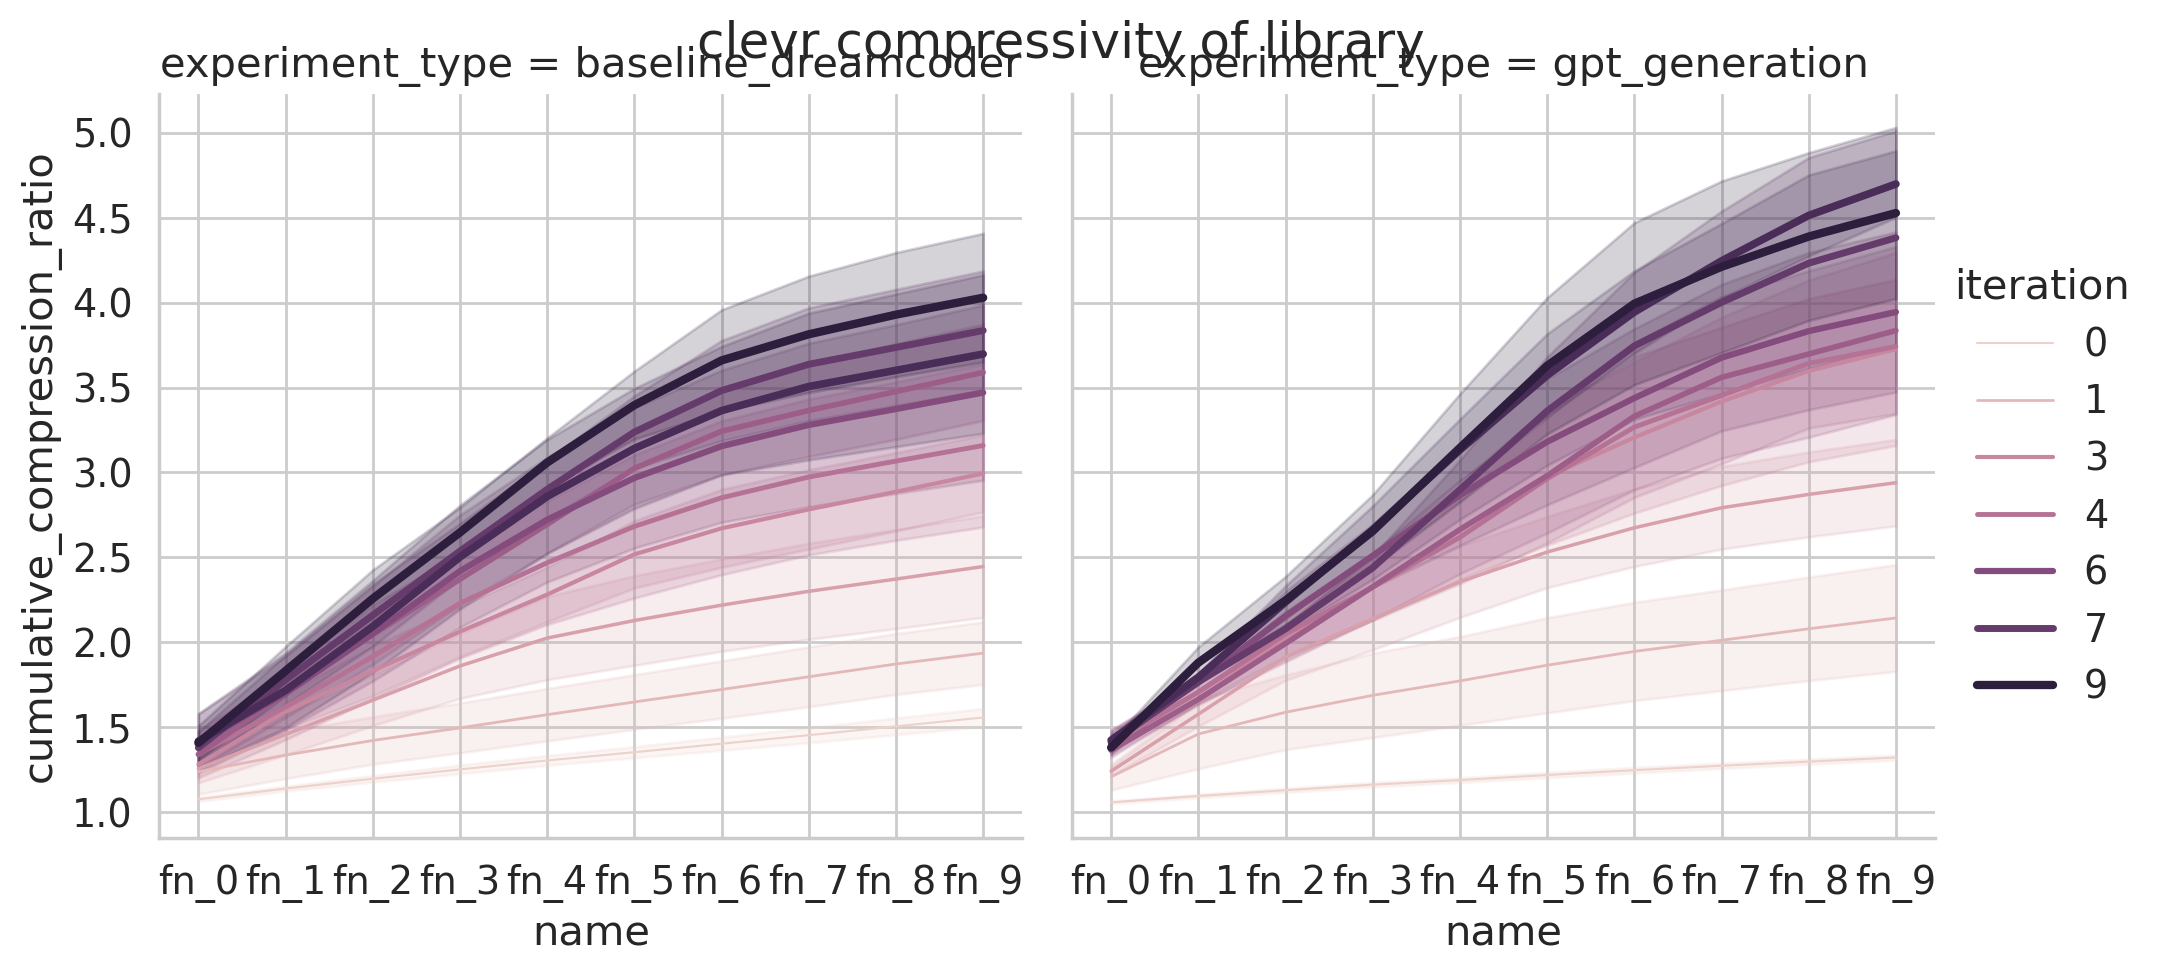

In [55]:
sns.relplot(data=df_abstractions, kind="line", errorbar="se", col="experiment_type", x="name", y="cumulative_compression_ratio", size="iteration", hue="iteration")
plt.suptitle(f"{DOMAIN} compressivity of library")

# Analysis 3: Solved programs

In [45]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df.to_csv(f"{DOMAIN}_search_results.csv")

# re2-specific analysis

In [47]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def task_order(keys):
    return [int(re.split(r'(\d+)', k[len("re2_test_"):])[1]) for k in keys]

def alpha_order(keys):
    return [re.split(r'(\d+)', k[len("re2_test_"):])[-1] for k in keys]

In [48]:
df_solved_i3 = df[~pd.isnull(df.best_search_time)].query("split == 'test'").query("iteration == 6").query("seed == 222")

In [49]:
df_solved_sorted = df_solved_i3[["task", "experiment_type", "best_search_time"]].pivot(index="task", columns=["experiment_type"]).sort_index(key=alpha_order)
df_solved_sorted = df_solved_sorted.reset_index(level=0)

In [50]:
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    display(df_solved_sorted)

task  \
experiment_type                                                                                                              
0                                                                          28-1_zero_hop-How big is the gray rubber thing?   
1                                                                                 26-1_zero_hop-How big is the gray thing?   
2                                                                               25-1_zero_hop-How big is the purple thing?   
3                                                                          21-1_zero_hop-The large cylinder is what color?   
4                                                                           23-1_zero_hop-The large sphere has what color?   
5                                                                           29-1_zero_hop-The metal cylinder is what size?   
6                                                                             27-1_zero_hop-The metal sphere is what size?   
7                                                                      22-1_zero_hop-The small metal sphere is what color?   
8                                                                          19-1_zero_hop-What color is the metal cylinder?   
9                                                                              18-1_zero_hop-What color is the small cube?   
10                                                                  20-1_zero_hop-What is the color of the small cylinder?   
11                                                                    16-1_zero_hop-What is the large brown thing made of?   
12                                                                  17-1_zero_hop-What is the material of the gray sphere?   
13                                                           14-1_zero_hop-What is the material of the large purple thing?   
14                                                               10-1_zero_hop-What is the shape of the cyan rubber thing?   
15                                                              11-1_zero_hop-What is the shape of the purple metal thing?   
16                                                                           15-1_zero_hop-What is the small cube made of?   
17                                                                          12-1_zero_hop-What material is the blue thing?   
18                                                                        13-1_zero_hop-What material is the purple thing?   
19                                                                          24-1_zero_hop-What size is the metal cylinder?   
20                                                 8-2_remove-If you removed the cyan cubes, how many cubes would be left?   
21                                            4-2_remove-If you removed the gray things, how many cylinders would be left?   
22                                            7-2_remove-If you removed the green spheres, how many spheres would be left?   
23                                          2-2_remove-If you removed the red metal things, how many things would be left?   
24                                        3-2_remove-If you removed the small brown things, how many things would be left?   
25                                             6-2_remove-If you removed the spheres, how many large things would be left?   
26                                            5-2_remove-If you removed the yellow things, how many spheres would be left?   
27                                                            0-2_remove-What if you removed all of the small gray things?   
28                                                          1-2_remove-What if you removed all of the small rubber things?   
29                                 9-1_single_or-How many cylinders are either small purple things or small rubber things?   
30                               4-1_single_or-How many green things are either small 